In [3]:
pip install mplcursors

     |████████████████████████████████| 92kB 4.1MB/s 
  Created wheel for mplcursors: filename=mplcursors-0.4-cp37-none-any.whl size=19969 sha256=267fa1f08c376ad4f2e641b5f642c33da98419a6fd56cb3f615d3c67cd14ef33
  Stored in directory: /root/.cache/pip/wheels/d5/ad/ce/d6113f8e662eb231215cbd3d853d09f772d3f0a28fcc2eae25
Successfully built mplcursors


In [5]:
import pandas as pd
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplcursors
# matplotlib.use('nbAgg' , warn = False , force = True)
# plt.rcParams.update({'figure.max_open_warning': 0})
import seaborn as sns

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
database = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SampleSuperstore.csv')

database


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [8]:
database = database.drop(columns=['Ship Mode' ,'Country' , 'Postal Code','Segment' ])
database.head()

,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [9]:
database.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [10]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          9994 non-null   object 
 1   State         9994 non-null   object 
 2   Region        9994 non-null   object 
 3   Category      9994 non-null   object 
 4   Sub-Category  9994 non-null   object 
 5   Sales         9994 non-null   float64
 6   Quantity      9994 non-null   int64  
 7   Discount      9994 non-null   float64
 8   Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 702.8+ KB


In [11]:
sales_database = database.groupby('Category' , as_index=False)['Sales'].sum()
sub_category =  database.groupby(['Category', 'Sub-Category'])['Sales'].sum()
sub_category['Sales'] = map(int,sub_category)
sales_database

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


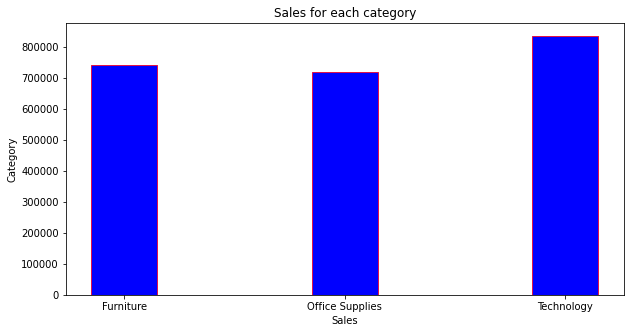

In [17]:
figure , axes = plt.subplots(figsize=(10,5))
axes.bar(sales_database['Category'] , sales_database['Sales'],color="#0000ff" , edgecolor = '#00bfff',width=0.3)
axes.set_title(label='Sales for each category',loc='center' , pad=None )
plt.xlabel('Sales', axes=axes)
plt.ylabel('Category' , axes=axes)
crs= mplcursors.cursor(axes,hover=True)
@crs.connect("add")
def after_adding(sel):
  x , y , width , height = sel.artist[sel.target.index].get_bbox().bounds
  pos = int(x+width/2)
  if position == 0 :
    text = ''
    for i in range(4):
      text = text+'\n' + sub_category.index[i][1]+' : '+ str(int(sub_category[i]))
  elif position == 1:
    text = ''
    for i in range(9):
      text = text+'\n' + sub_category.index[i+4][1]+' : '+ str(int(sub_category[i]))
  else:
    text=''
    for i in range(4):
      text = text+'\n' + sub_category.index[i+13][1]+' : '+ str(int(sub_category[i]))


  sel.annotation.set(text=text,position=(position,70000))
  sel.annotation.xy = (x + width/2 , y + height)




In [14]:
prof_database = database.groupby('State' , as_index=False)['Profit'].sum()
prof_database.head()

,State,Profit
0,Alabama,5786.8253
1,Arizona,-3427.9246
2,Arkansas,4008.6871
3,California,76381.3871
4,Colorado,-6527.8579


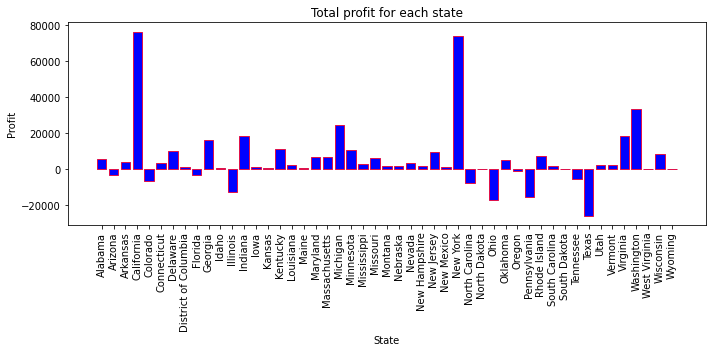

In [28]:
figure , axes = plt.subplots(figsize=(10,5))
axes.bar(prof_database['State'] , prof_database['Profit'],color ='#0000ff' , edgecolor='#de124c' )
axes.set_title(label = "Total profit for each state" , loc='center' , pad=None)
plt.xlabel('State', axes=axes)
plt.ylabel('Profit' , axes=axes)
axes.set_xticklabels(prof_database['State'],rotation=90)
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


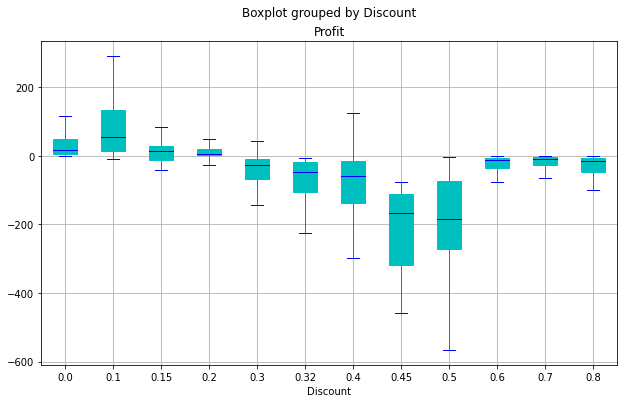

In [24]:
prop = dict(boxes="c" , medians="Blue" , caps="blue")
database.boxplot(by='Discount' , column='Profit' , showfliers=False , figsize=(10,6) , patch_artist=True , color=prop)

Analyzing states that faced loss find p/l for all items

In [25]:
state = prof_database.loc[prof_database.Profit<0]
state

,State,Profit
1,Arizona,-3427.9246
4,Colorado,-6527.8579
8,Florida,-3399.3017
11,Illinois,-12607.8870
31,North Carolina,-7490.9122
33,Ohio,-16971.3766
35,Oregon,-1190.4705
36,Pennsylvania,-15559.9603
40,Tennessee,-5341.6936
41,Texas,-25729.3563


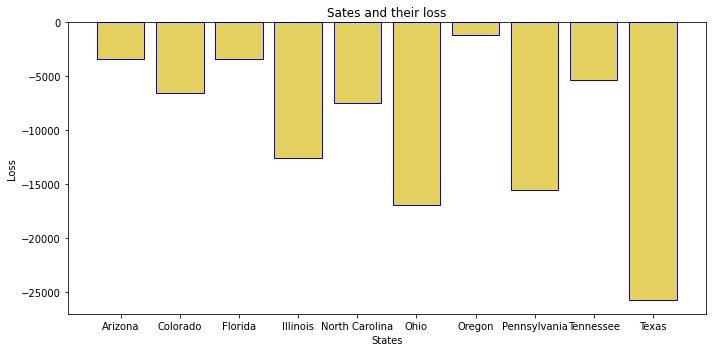

In [30]:
figure , axes = plt.subplots(figsize=(10,5))
def plot_state(axes):
  axes.bar(state['State'] , state['Profit'] ,color='#e3d05f' , edgecolor='blue' )
  axes.set_title(label="Sates and their loss" , loc='center' , pad=None)
  plt.xlabel('States' , axes=axes)
  plt.ylabel('Loss' , axes=axes)

plot_state(axes)
plt.tight_layout()

In [32]:
state1 = database.loc[database.Profit < 0].reset_index(drop=True)
state2 = database.loc[database.Profit >= 0].reset_index(drop=True)
database1 = state1.groupby(['Region' , 'State' ] , as_index=False)['Profit'].count()
database1 = database1[database1.Profit > 40]
database1

,Region,State,Profit
0,Central,Illinois,255
1,Central,Texas,486
8,East,New York,47
9,East,Ohio,209
10,East,Pennsylvania,278
13,South,Florida,126
14,South,North Carolina,68
15,South,Tennessee,65
16,West,Arizona,85
17,West,California,105
